In [189]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

## Helpers

In [228]:
def plot_vectors(vectors=[(0, 0, 1, 2),(0, 0, 3, 1)], 
                 texts=[r'$\vec{a}$', r'$\vec{b}$', 'power vec', 'power vec2'], 
                 texts_locs=[(0.5, 0.7), (0.2, 0.8), (0.7, 0.5),  (0.5, 0.5)], text_size=18, 
                 colors=["#2EBCE7","#00E64E", "purple", 'orange'],   
                 xlim=(-1, 3), ylim=(-1,3), x_label='x', y_label='y', 
                 scale=1, scale_units='xy'):
    fig, ax =plt.subplots(figsize=(6,6))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    for i, vec in enumerate(vectors):
        ax.quiver(*vec, color=colors[i], angles='xy', scale_units=scale_units, scale=scale)
        plt.text(*texts_locs[i], texts[i], color=colors[i], size=text_size)

    # draw axes
    plt.axhline(0, c='#d6d6d6', zorder=0)
    plt.axvline(0, c='#d6d6d6', zorder=0)

    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    return ax

#from https://en.wikipedia.org/wiki/Power_iteration
def power_iteration(A, num_simulations: int):
    # Ideally choose a random vector
    # To decrease the chance that our vector
    # Is orthogonal to the eigenvector
    b_k = np.random.rand(A.shape[1])

    for _ in range(num_simulations):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        # re normalize the vector
        b_k = b_k1 / b_k1_norm

    return b_k

## Power iteration

In [229]:
orig_vec=np.array([np.array([0.5, 0.5]), np.array([0.2, 0.8])])
orig_vec=np.array([np.array([0.5, 0.5]), np.array([0.2, 0.8])*1.2])
orig_vec=orig_vec*3
orig_vec

array([[1.5 , 1.5 ],
       [0.72, 2.88]])

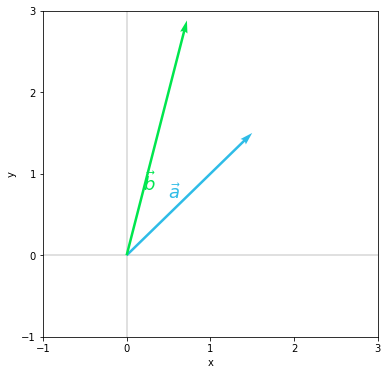

In [230]:
plot_vectors(orig_vec)

In [231]:
power_vec=power_iteration(orig_vec, 10)

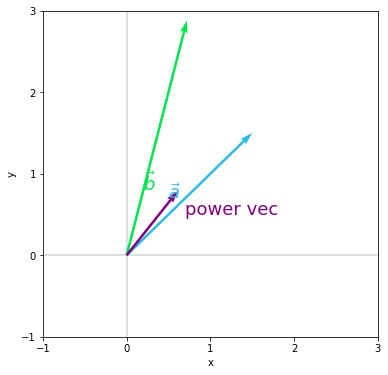

In [232]:
plot_vectors(np.append(orig_vec, power_vec.reshape(1,2), axis=0))

We can see that it doenst converge fully to one of the vectors (and to the longest)

In [233]:
np.linalg.norm(power_vec)

1.0

In [234]:
power_vec

array([0.61218618, 0.79071365])

In [235]:
#which vector was dominant
np.linalg.norm(orig_vec[0]), np.linalg.norm(orig_vec[1])

(2.1213203435596424, 2.9686360504447156)

In [236]:
orig_vec[0], orig_vec[1]

(array([1.5, 1.5]), array([0.72, 2.88]))

## Second example

In [237]:
#source http://mlwiki.org/index.php/Power_Iteration
def eigenvalue(A, v):
    Av = A.dot(v)
    return v.dot(Av)

def power_iteration2(A):
    n, d = A.shape

    v = np.ones(d) / np.sqrt(d)
    ev = eigenvalue(A, v)

    while True:
        Av = A.dot(v)
        v_new = Av / np.linalg.norm(Av)

        ev_new = eigenvalue(A, v_new)
        if np.abs(ev - ev_new) < 0.01:
            break

        v = v_new
        ev = ev_new

    return ev_new, v_new

In [238]:
eigen_value, power_vec2 = power_iteration2(orig_vec)

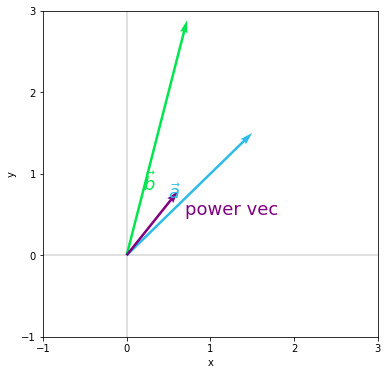

In [239]:
plot_vectors(np.append(orig_vec, power_vec2.reshape(1,2), axis=0))

## Simultaneous power iteration

In [240]:
def simultaneous_power_iteration(A, k):
    n, m = A.shape
    Q = np.random.rand(n, k)
    Q, _ = np.linalg.qr(Q)
    Q_prev = Q
 
    for i in range(1000):
        Z = A.dot(Q)
        Q, R = np.linalg.qr(Z)

        # can use other stopping criteria as well 
        err = ((Q - Q_prev) ** 2).sum()
        if i % 10 == 0:
            print(i, err)

        Q_prev = Q
        if err < 1e-3:
            break

    return np.diag(R), Q

In [241]:
eigen_values, power_vecs = simultaneous_power_iteration(orig_vec, 2)

0 0.029537495322638656


In [242]:
eigen_values

array([3.42649765, 0.94557193])

In [243]:
power_vecs

array([[-0.61514937, -0.78841058],
       [-0.78841058,  0.61514937]])

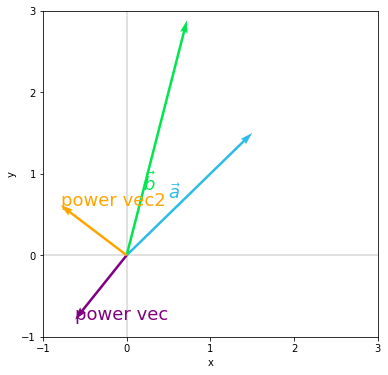

In [247]:
plot_vectors(np.append(orig_vec, power_vecs, axis=0), texts_locs=[(0.5, 0.7), (0.2, 0.8), power_vecs[0],  power_vecs[1]])